In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import string

In [ ]:
# Descargar stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bdDe.csv')
df.head()

Authors  \
0  Nivaashini M.; Suganya E.; Sountharrajan S.; P...   
1                          Salmeron J.L.; Arévalo I.   
2  Mensah J.A.; Nortey E.N.N.; Ocran E.; Iddi S.;...   
3  Rooney J.; Rivera-de-Torre E.; Li R.; Mclean K...   
4  Asghar N.; Khalil U.; Ahmad B.; Alshanbari H.M...   

                                   Author full names  \
0  Nivaashini, M. (57201428943); Suganya, E. (571...   
1  Salmeron, Jose L. (7005863394); Arévalo, Irina...   
2  Mensah, Joseph Agyapong (57219710912); Nortey,...   
3  Rooney, James (58346410000); Rivera-de-Torre, ...   
4  Asghar, Naseem (56809206400); Khalil, Umair (5...   

                                        Author(s) ID  \
0  57201428943; 57194427618; 57192169178; 5577814...   
1                            7005863394; 56600586400   
2  57219710912; 35559307000; 57313527900; 5525060...   
3  58346410000; 57190045208; 58360855600; 1400765...   
4  56809206400; 57208803557; 59045333900; 5724257...   

                                               Title  Year  \
0  FEDDBN-IDS: federated deep belief network-base...  2024   
1     Blind Federated Learning without initial model  2024   
2  De-occlusion and recognition of frontal face i...  2024   
3  Structural and functional analyses of nematode...  2024   
4  Improved nonparametric survival prediction usi...  2024   

                                        Source title  Cited by  \
0            Eurasip Journal on Information Security         0   
1                                Journal of Big Data         0   
2                                Journal of Big Data         0   
3  Computational and Structural Biotechnology Jou...         0   
4        BMC Medical Informatics and Decision Making         0   

                          DOI  \
0  10.1186/s13635-024-00156-5   
1  10.1186/s40537-024-00911-y   
2  10.1186/s40537-024-00925-6   
3  10.1016/j.csbj.2024.04.019   
4  10.1186/s12911-024-02525-z   

                                                Link  \
0  https://www.scopus.com/inward/record.uri?eid=2...   
1  https://www.scopus.com/inward/record.uri?eid=2...   
2  https://www.scopus.com/inward/record.uri?eid=2...   
3  https://www.scopus.com/inward/record.uri?eid=2...   
4  https://www.scopus.com/inward/record.uri?eid=2...   

                                            Abstract  \
0  Over the last 20 years, Wi-Fi technology has a...   
1  Federated learning is an emerging machine lear...   
2  Increasingly, automatic face recognition algor...   
3  The complex relationships between gastrointest...   
4  In recent times, time-to-event data such as ti...   

                                     Author Keywords  \
0  Deep learning (DL); Federated learning (FL); I...   
1  Federated learning; Fuzzy Cognitive Maps; Priv...   
2  62H25; 62H35; 94A08; Absolute mean brightness ...   
3  Antimicrobial peptides; Bacillus subtilis; Hel...   
4  CoxBoost; CoxPH; DeepHit Neural Network; Featu...   

                                      Index Keywords Document Type  \
0  Computer crime; Cybersecurity; Deep learning; ...       Article   
1  Fuzzy rules; Learning systems; Machine learnin...       Article   
2  Discrete wavelet transforms; Entropy; Face rec...       Article   
3  Bacteriology; Microorganisms; Peptides; dimeti...       Article   
4                                                NaN       Article   

  Publication Stage                        Open Access  Source  
0             Final  All Open Access; Gold Open Access  Scopus  
1             Final  All Open Access; Gold Open Access  Scopus  
2             Final  All Open Access; Gold Open Access  Scopus  
3             Final  All Open Access; Gold Open Access  Scopus  
4             Final  All Open Access; Gold Open Access  Scopus

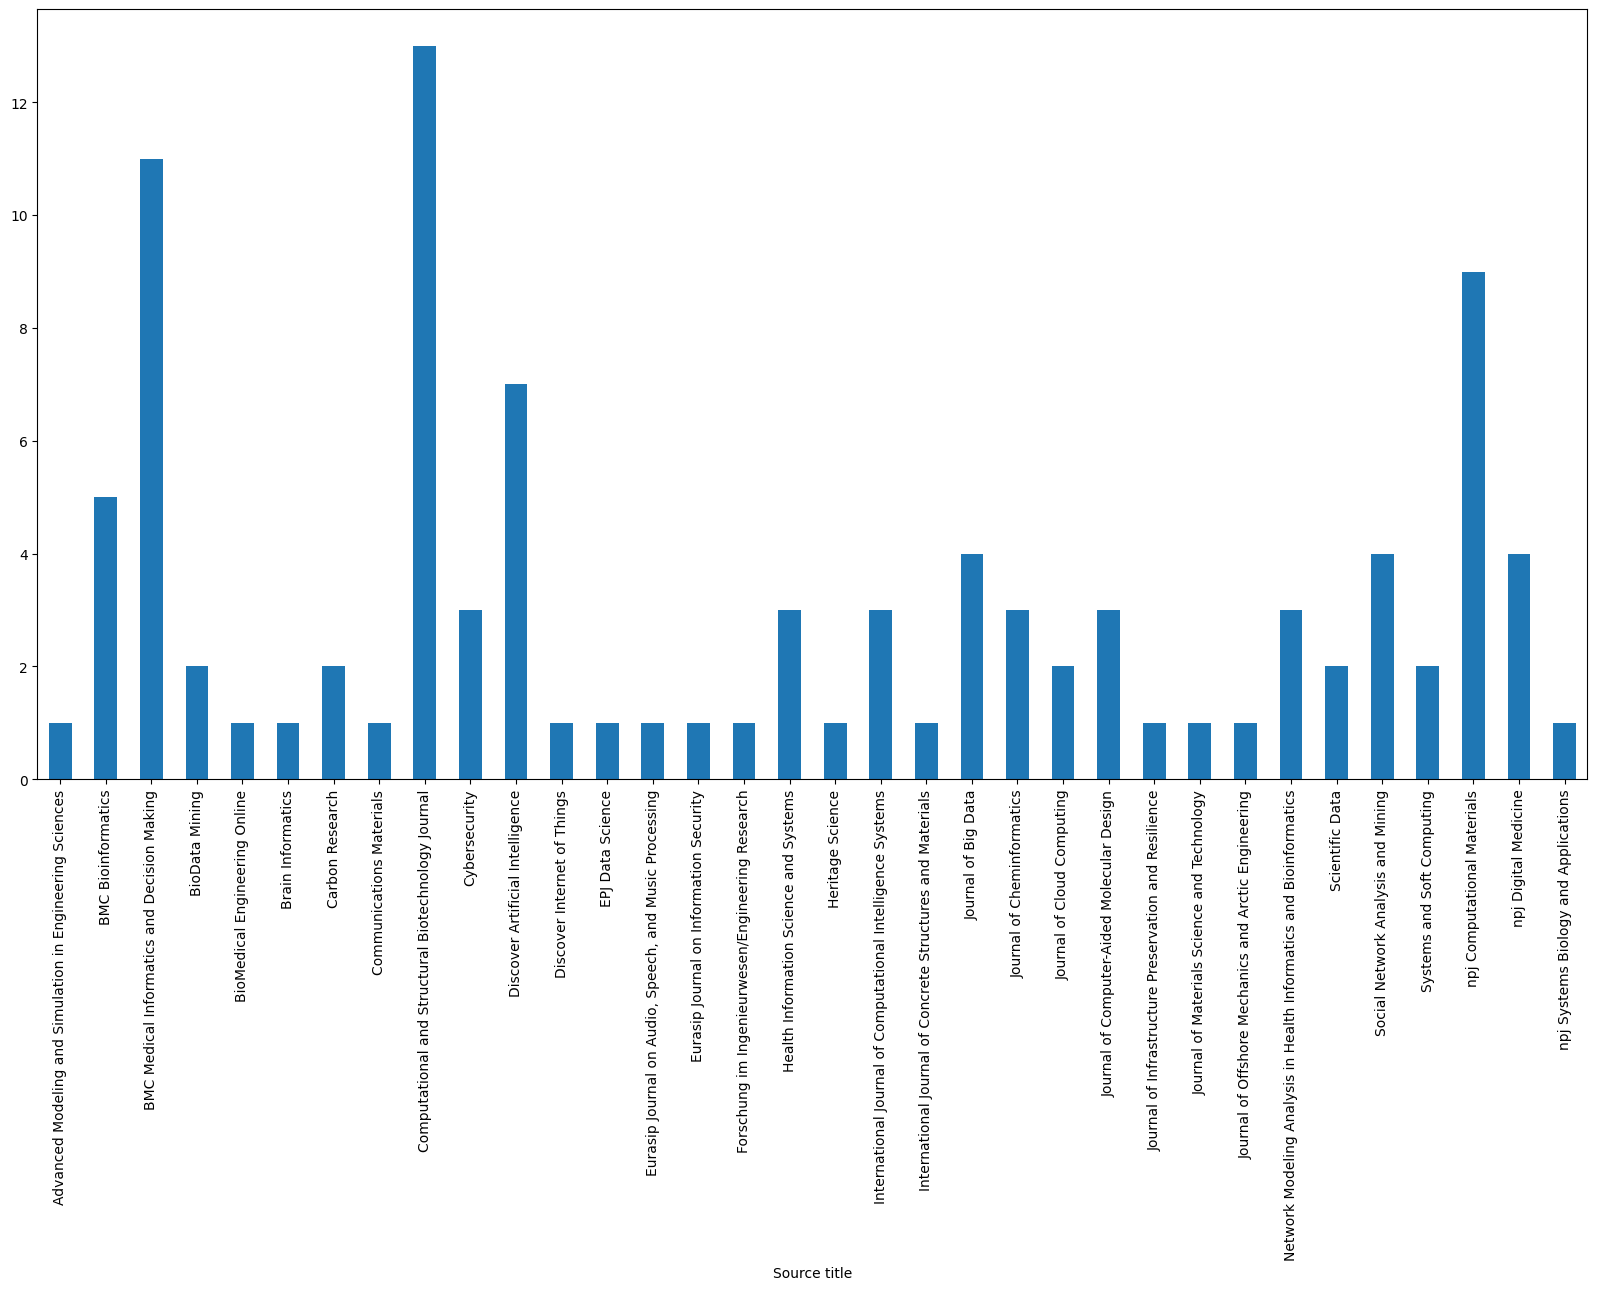

In [ ]:
grouped = df.groupby('Source title')['Title'].count()
plt.figure(figsize=(20, 10))
grouped.plot(kind='bar')
plt.show()

ANALISIS TITLE

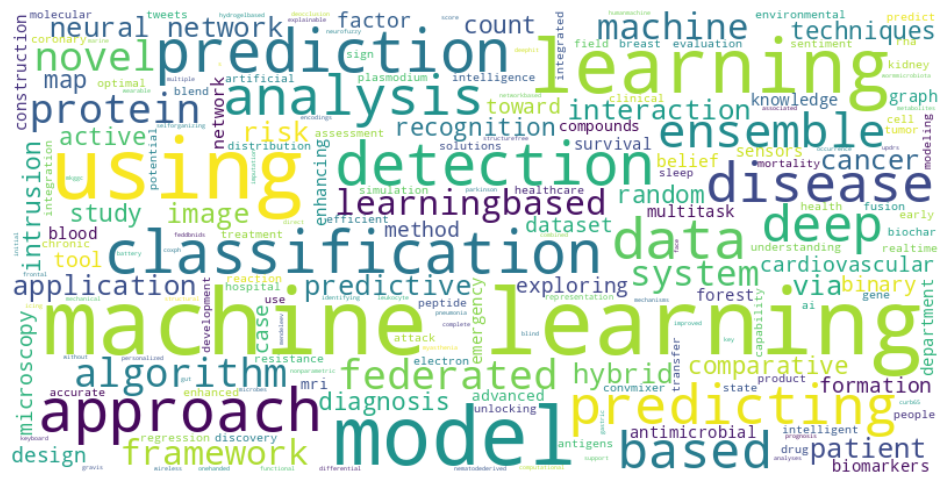

In [ ]:
#from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.title('')
plt.show()



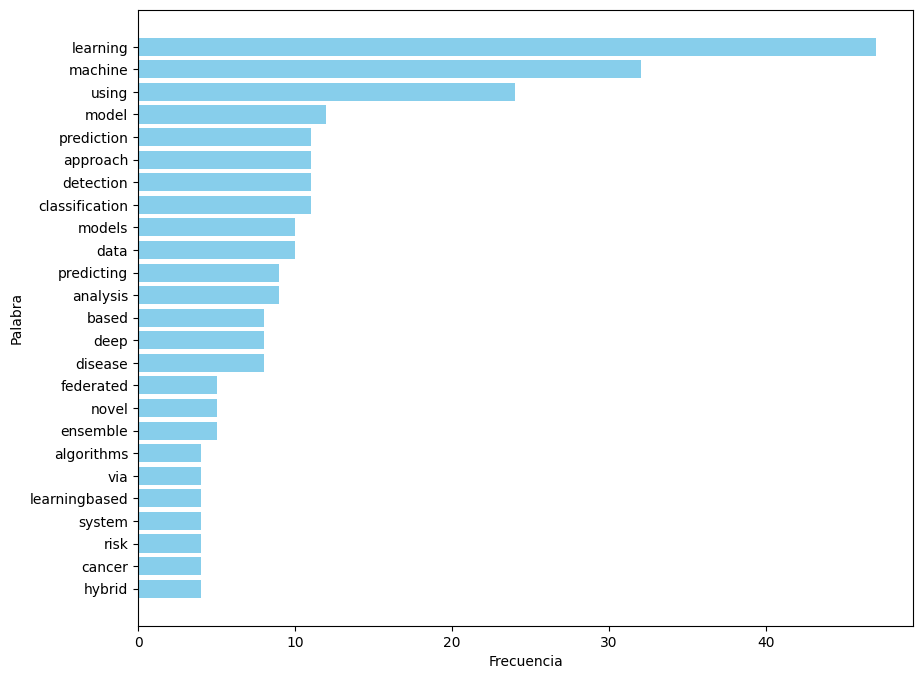

In [ ]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

# Contar la frecuencia de cada palabra en los títulos
word_counts_title = Counter(text.split())

# Convertir el conteo de palabras en un DataFrame
word_df_title = pd.DataFrame(word_counts_title.items(), columns=['Word', 'Frequency'])

# Ordenar el DataFrame por frecuencia de manera ascendente y tomar las 25 palabras más frecuentes
top_words_title = word_df_title.sort_values(by='Frequency', ascending=False).head(25)

# Generar el gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(top_words_title['Word'], top_words_title['Frequency'], color='skyblue')  # Usamos 'barh' para un gráfico horizontal
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar las palabras más frecuentes arriba
plt.show()


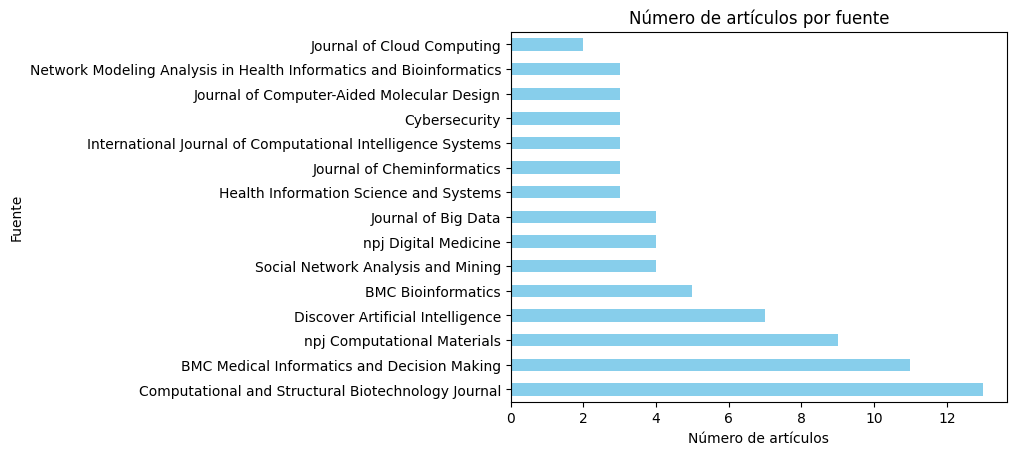

In [ ]:
grouped = df.groupby('Source title')['Title'].count().sort_values(ascending=False)
top_sources = grouped.head(15)
top_sources.plot(kind='barh', color='skyblue')  # Cambio a barh para gráfico horizontal
plt.title('Número de artículos por fuente')
plt.xlabel('Número de artículos')
plt.ylabel('Fuente')
plt.show()


In [ ]:
# Función para limpiar y preparar texto
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word not in stop_words])

# Analizar Titulos

In [ ]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Contar palabras en todos los títulos
word_counts = Counter()
df['clean_title'].str.split().apply(word_counts.update)

# Crear un DataFrame a partir del contador de palabras
word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Ordenar las palabras por frecuencia de aparición, de mayor a menor
word_df = word_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Añadir columna de rank
word_df['Rank'] = word_df['Frequency'].rank(method='dense', ascending=False)

# Mostrar el DataFrame de palabras ordenadas por rango
word_df.head(20)

Word  Frequency  Rank
0         learning         47   1.0
1          machine         32   2.0
2            using         24   3.0
3            model         12   4.0
4       prediction         11   5.0
5         approach         11   5.0
6        detection         11   5.0
7   classification         11   5.0
8           models         10   6.0
9             data         10   6.0
10      predicting          9   7.0
11        analysis          9   7.0
12           based          8   8.0
13            deep          8   8.0
14         disease          8   8.0
15       federated          5   9.0
16           novel          5   9.0
17        ensemble          5   9.0
18      algorithms          4  10.0
19             via          4  10.0

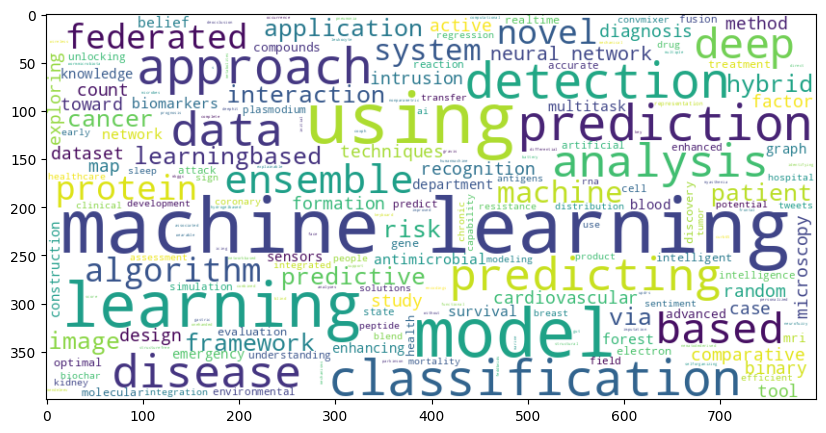

In [ ]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

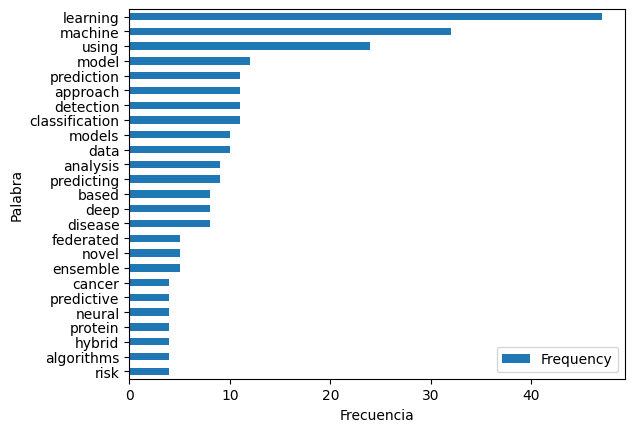

In [ ]:
# Ordenar el dataframe por frecuencia de manera ascendente y tomar las 25 palabras más frecuentes
top_words = word_df.sort_values(by='Frequency', ascending=True).tail(25)

# Generar el gráfico de barras
ax = top_words.plot(x='Word', y='Frequency', kind='barh')  # Usamos 'barh' para un gráfico horizontal
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')

plt.show()


ANALISA EL ABSTRACT


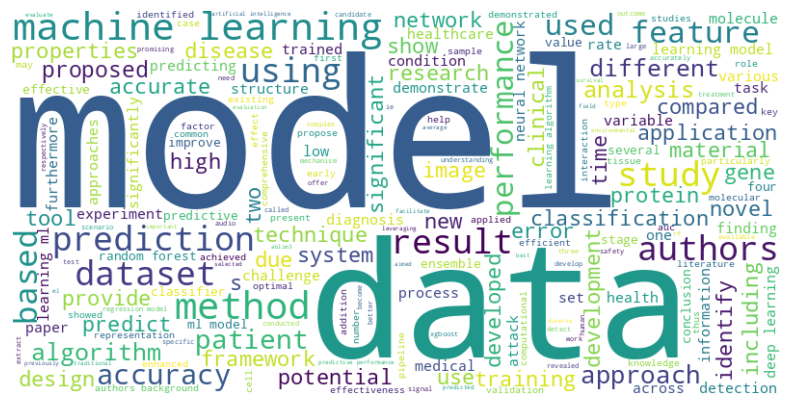

In [ ]:
# Aplicar la limpieza de texto a los abstracts
df['clean_abstract'] = df['Abstract'].apply(clean_text)  # Reemplaza 'Abstract' por el nombre de la columna que contiene los abstracts

# Concatenar todos los abstracts limpios en un solo texto
text = ' '.join(df['clean_abstract'])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Usamos 'off' para ocultar los ejes
plt.show()


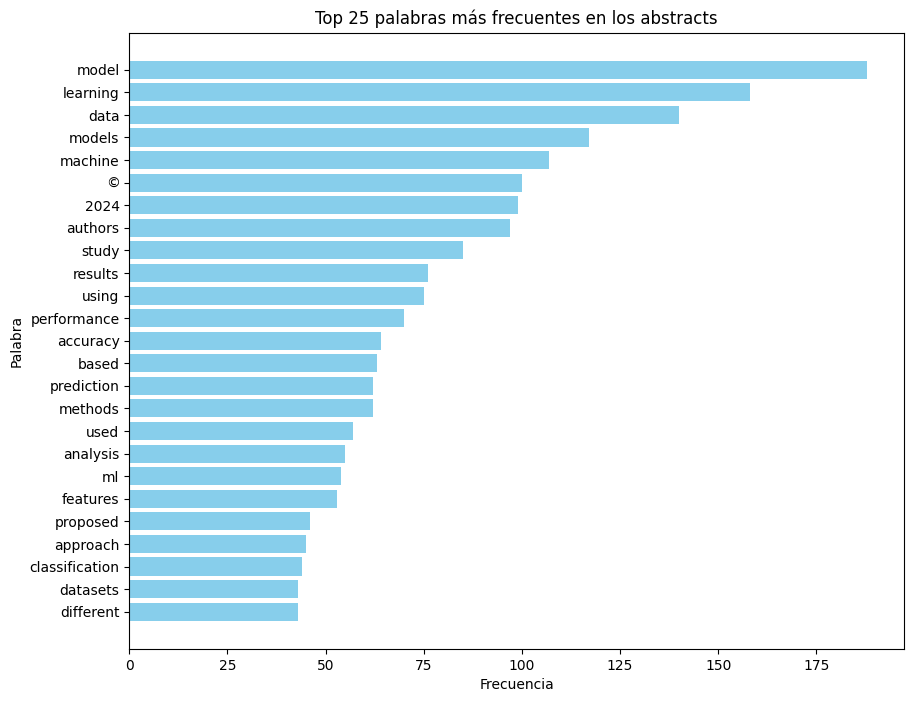

In [ ]:
# Aplicar la limpieza de texto a los abstracts
df['clean_abstract'] = df['Abstract'].apply(clean_text)

# Concatenar todos los abstracts limpios en un solo texto
text = ' '.join(df['clean_abstract'])

# Contar la frecuencia de cada palabra en los abstracts
word_counts_abstract = Counter(text.split())

# Convertir el conteo de palabras en un DataFrame
word_df_abstract = pd.DataFrame(word_counts_abstract.items(), columns=['Word', 'Frequency'])

# Ordenar el DataFrame por frecuencia de manera ascendente y tomar las 25 palabras más frecuentes
top_words_abstract = word_df_abstract.sort_values(by='Frequency', ascending=False).head(25)

# Generar el gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(top_words_abstract['Word'], top_words_abstract['Frequency'], color='skyblue')  # Usamos 'barh' para un gráfico horizontal
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Top 25 palabras más frecuentes en los abstracts')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar las palabras más frecuentes arriba
plt.show()


<ipython-input-85-2f8022b465fd>:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama


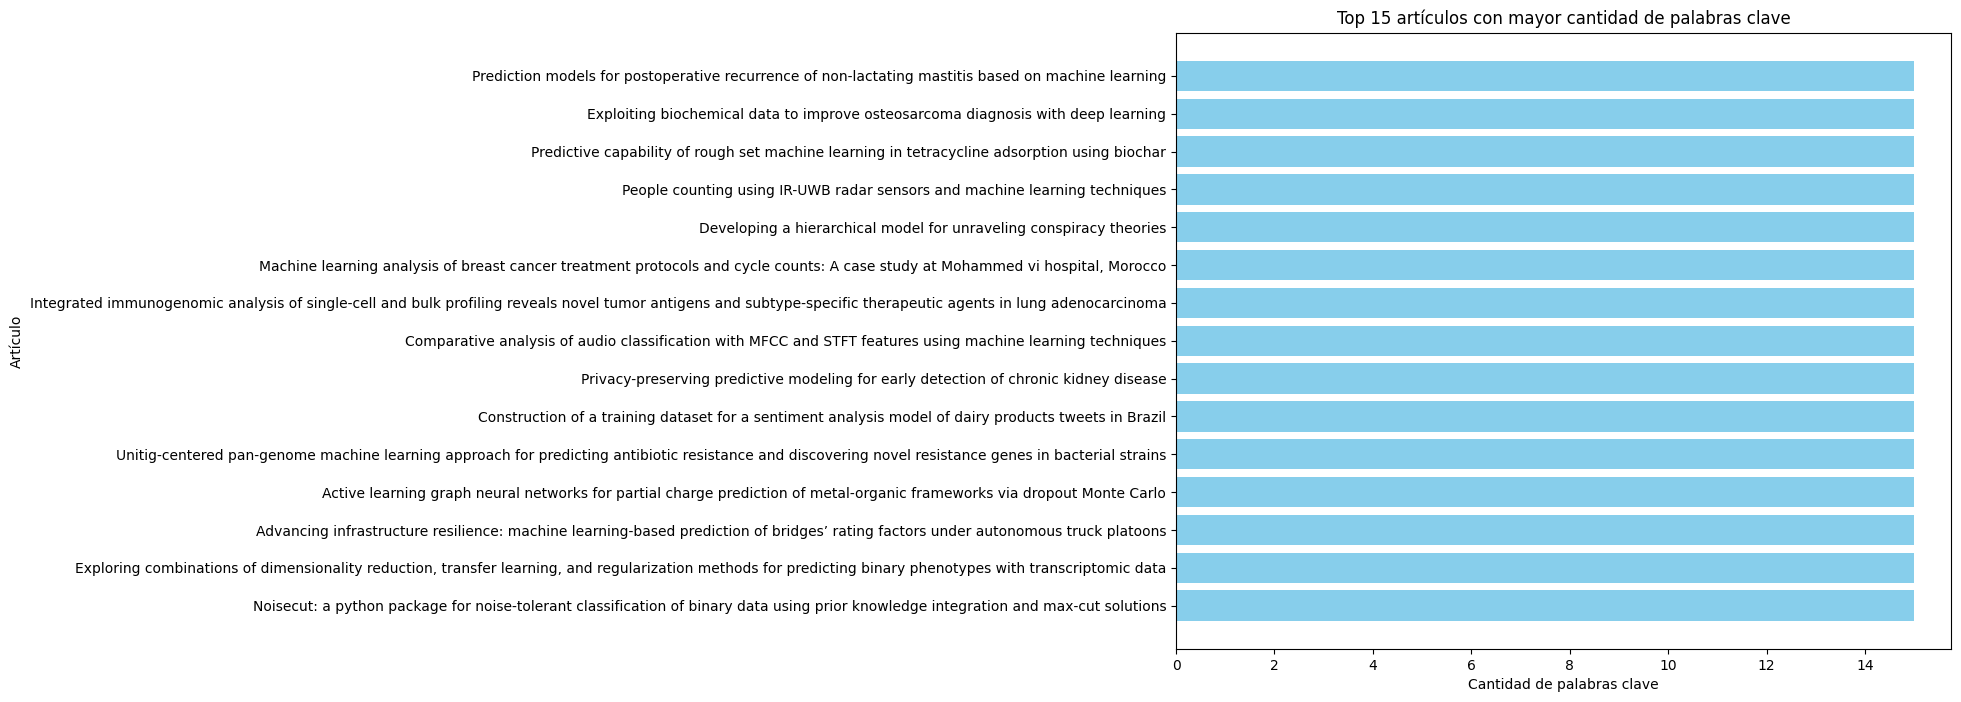

In [ ]:


# Contar palabras en todos los títulos
word_counts = Counter()
df['Title'].apply(lambda title: word_counts.update(clean_text(title)))

# Determinar un número de palabras clave a considerar (e.g., top 15)
num_keywords = 15
keywords = [word for word, count in word_counts.most_common(num_keywords)]

# Función para contar cuántas palabras clave contiene cada título
def count_keywords(title):
    words = clean_text(title)
    return sum(word in words for word in keywords)

# Contar las palabras clave por título
df['keyword_count'] = df['Title'].apply(count_keywords)

# Ordenar el DataFrame por 'keyword_count' de forma descendente
df_sorted = df.sort_values(by='keyword_count', ascending=False)

# Graficar los top 15 artículos con más palabras clave
plt.figure(figsize=(10, 8))
plt.barh(df_sorted['Title'].head(15), df_sorted['keyword_count'].head(15), color='skyblue')  # Usamos barh para un gráfico horizontal
plt.xlabel('Cantidad de palabras clave')
plt.ylabel('Artículo')
plt.title('Top 15 artículos con mayor cantidad de palabras clave')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar los artículos con más palabras clave arriba
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()



# ANALIZAR ABSTRACT

In [ ]:


# Seleccionar los abstracts de los artículos con más palabras clave
top_abstracts = df.sort_values(by='keyword_count', ascending=False).head(10,)['Abstract']

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:3]  # Tomar las 3 oraciones con mayor puntuación
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado
top_abstracts_summary = top_abstracts.apply(summarize_abstract)

# Mostrar resúmenes
for i, summary in enumerate(top_abstracts_summary, 1):
    print(f"Resumen {i}:\n{summary}\n")


Resumen 1:
Totally 258 patients were randomly divided into a training set and a test set according to a 75%-25% proportion. Objectives: This study aims to build a machine learning (ML) model to predict the recurrence probability for postoperative non-lactating mastitis (NLM) by Random Forest (RF) and XGBoost algorithms. The results of tenfold cross-validation suggest that both the RF model and the XGBoost model have good predictive performance, but the XGBoost model has a better performance than the RF model in our study.

Resumen 2:
Concretely, we analyze the added value of integrating the biochemical data, i.e., alkaline phosphatase (ALP) and lactate dehydrogenase (LDH), and design a model that incorporates the numerical features of ALP and LDH and the visual features of X-ray imaging through a late fusion approach in the feature space. The experimental results reveal the effectiveness of incorporating ALP and LDH simultaneously in a late fusion approach, with the accuracy of the con

In [ ]:
# Contar la aparición de palabras clave en cada título
df['keyword_count'] = df['Title'].apply(lambda x: sum(word in clean_text(x) for word in word_df))

# Seleccionar los abstracts de los artículos con más palabras clave
top_articles = df.sort_values(by='keyword_count', ascending=False).head(10)

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:2]
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado y almacenar junto con el título
top_articles['Summary'] = top_articles['Abstract'].apply(summarize_abstract)

# Mostrar títulos y resúmenes
for index, row in top_articles.iterrows():
    print(f"Title: {row['Title']}\nSummary: {row['Summary']}\n")


Title: FEDDBN-IDS: federated deep belief network-based wireless network intrusion detection system
Summary: Wi-Fi network security is severely questioned since there is no physical barrier separating a wireless network from a wired network, and the security procedures in place are defenseless against a wide range of threats. This study set out to assess federated learning, a new technique, as a possible remedy for privacy issues and the high expense of data collecting in network attack detection.

Title: Comparative analysis of audio classification with MFCC and STFT features using machine learning techniques
Summary: In the era of automated and digitalized information, advanced computer applications deal with a major part of the data that comprises audio-related information. Advancements in technology have ushered in a new era where cutting-edge devices can deliver comprehensive insights into audio content, leveraging sophisticated algorithms such such as Mel Frequency Cepstral Coeffi